# Jeu de données Iris


Nous allons utiliser le jeu de données Iris 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Chargement des données
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Pour pouvoir afficher les résultats, on va utiliser seulement les 
premiers deux attributs (longueur et largeur des sépales).

In [ ]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [ ]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

**Question
Calculez le score d’échantillons bien classifiés sur le jeu de données de test**

In [ ]:
lin_svc.score(X_test,y_test)

0.7466666666666667

Visualisons maintenant la surface de décision apprise par notre modèle

Text(0.5, 1.0, 'LinearSVC')

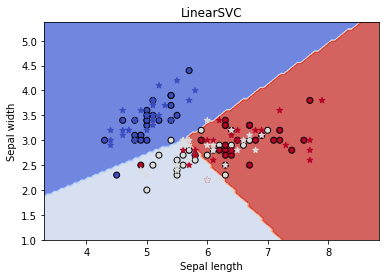

In [ ]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


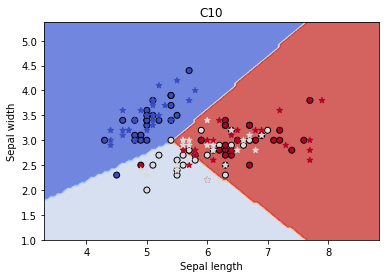

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


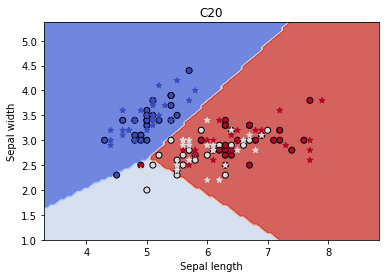

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


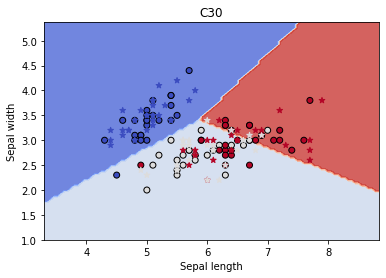

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


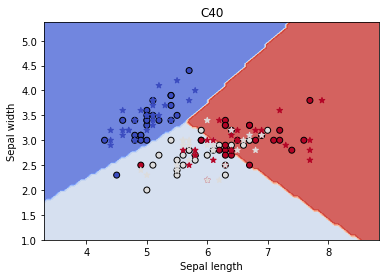

In [ ]:
for i in range (10,50,10):
  lin_svc = svm.LinearSVC(C=i)
  lin_svc.fit(X_train, y_train)
  # Créer la surface de décision discretisée
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
  h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Surface de décision
  Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
  c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
  cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title("C{}".format(i))
  plt.show()

Le paramètre de régularisation C indique à l'optimisation SVM dans quelle mesure on souhaite éviter de mal classer chaque exemple d'entraînement.En d’autre termes, pour les grandes valeurs de C, l'optimisation choisira un hyperplan à marge réduite si cet hyperplan réussit mieux à classer correctement tous les points d'apprentissage. À l'inverse, une très petite valeur de C amènera l'optimiseur à rechercher un hyperplan de séparation à plus grande marge, même si cet hyperplan classe mal plus de points.


**Question
D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au 
problème ? Si non, que peut-on faire pour l’améliorer ?**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


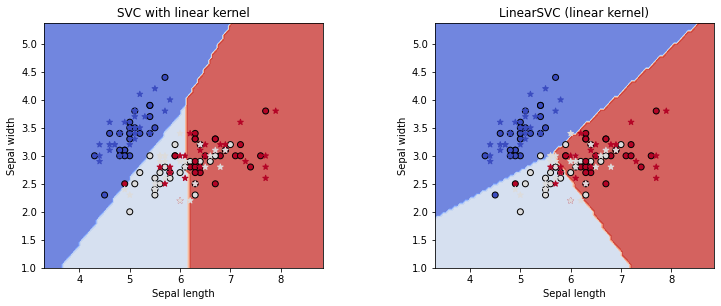

In [ ]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
 plt.subplot(1, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Utiliser une palette de couleurs
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 # Afficher aussi les points d'apprentissage
 plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
 plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', 
c=y_test, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.title(titles[i])
plt.show()

Le modèle n'est pas adapté au  problème, il n'arrive pas à bien séparer les classes bleu et rouge.On ne peut pas séparer ces deux classes par une ligne droite .Comme solution on peut utiliser le rbf kernel pour prendre en considération la non_linéarité de la data

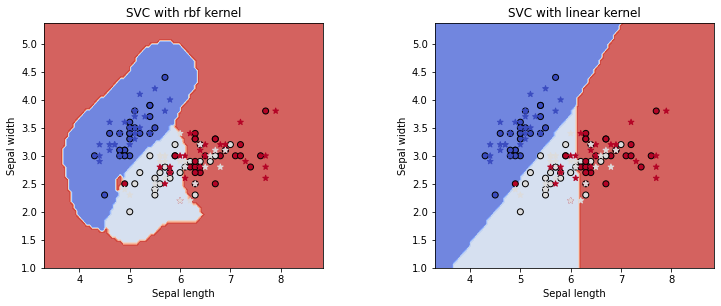

In [ ]:
C=1.0
lin_svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='rbf', C=C,gamma=5).fit(X_train, y_train)
titles = ['SVC with rbf kernel', 'SVC with linear kernel']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
 plt.subplot(1, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Utiliser une palette de couleurs
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 # Afficher aussi les points d'apprentissage
 plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
 plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', 
c=y_test, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.title(titles[i])
plt.show()

**Question
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire 
mais en utilisant les quatre attributs du jeu de données Iris. Le score de 
classification en test a-t-il augmenté ? Pourquoi ?**

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9333333333333333

Aprés avoir utilisé les quatre attribut ,on constate que le score de classification a augmenté. Cela vient du fait que SVM sont efficaces dans le cas où la dimension de l’espace est plus grande

# Jeu de données Digits

**Question :
Utilisez les données Digits pour construire un classifieur LinearSVC et 
évaluez-le**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
para = {'kernel':['rbf','linear'],'C':[10,11,12,15,20,30,40,50,70]}
clf = GridSearchCV(svm.SVC(), para, cv=2)
clf.fit(X_train,y_train)
print("\n The best estimator :",clf.best_estimator_)
print("\n the best score : ",clf.best_score_)


 The best estimator : SVC(C=11)

 the best score :  0.975


pour C=11 pn obient le meilleur score de l'ordre de 095

In [ ]:
lin_svc.score(X_test,y_test)

0.9666666666666667